Creating the Quantum Circuit: We start by creating a quantum circuit with two qubits (QuantumCircuit(2, 2)), where the first argument is the number of qubits, and the second argument is the number of classical bits used for measurement outcomes.
Applying Hadamard Gate (H Gate): The Hadamard gate (qc.h(0)) is applied to the first qubit (qubit 0). The Hadamard gate puts the qubit in a superposition of states, meaning it has an equal probability of being measured in the |0⟩ state or the |1⟩ state.
Applying Controlled-NOT (CNOT) Gate: The controlled-NOT gate (qc.cx(0, 1)) is applied with qubit 0 as the control qubit and qubit 1 as the target qubit. If the control qubit (qubit 0) is in state |1⟩, it flips the state of the target qubit (qubit 1). This gate entangles the two qubits, meaning their states become correlated.
Measuring Both Qubits: Finally, both qubits are measured (qc.measure([0, 1], [0, 1])). The measurement collapses the superposition of states into definite classical states, and the measurement outcomes are stored in classical bits.

In [11]:
!pip install qiskit
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 24.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.9 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.6-py3-none-any.whl size=340124 sha256=98609a0feb4eaadf48ce6421e6595640dbfd304c43a1ffb88e7dfdbbccc58693
  Stored in directory: /root/.cache/pip/wheels/84/ea/c4/db9cbf7a0503ed556412eb1082a1cfdb67e030ef592bab7a29
  Created wheel for ibm-cloud-sdk

In [7]:
!pip install pylatexenc

In [8]:
!pip install matplotlib

In [19]:
!pip install qiskit-aer
!pip install qiskit-aer-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (21.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 MB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Li

**Introduction**

This notebook shows how to import the Qiskit Aer simulator backend and use it to run ideal (noise free).

In [21]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [22]:
simulator = AerSimulator()

**Simulating a Quantum Circuit**

The basic operation runs a quantum circuit and returns a counts dictionary of measurement outcomes. Here we run a simple circuit that prepares a 2-qubit Bell-state and measures both qubits.

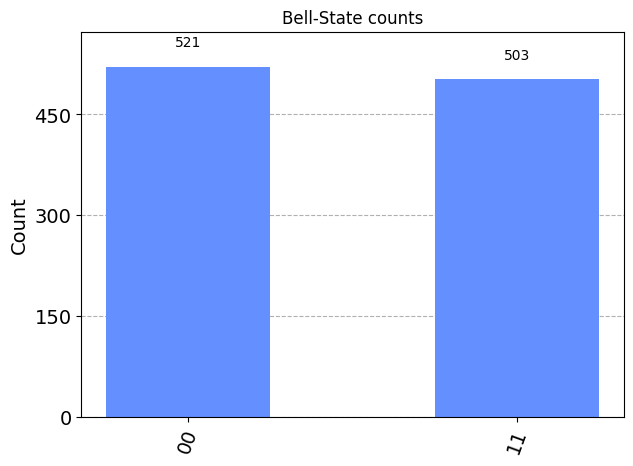

In [23]:

# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [24]:

# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)


['11', '11', '00', '00', '00', '11', '11', '11', '00', '00']


In [14]:
"""
Example showing how to draw a quantum circuit using Qiskit.
"""

from qiskit import QuantumCircuit


def build_bell_circuit():
    """Returns a circuit putting 2 qubits in the Bell state."""
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure([0, 1], [0, 1])
    return qc


# Create the circuit
bell_circuit = build_bell_circuit()

# Use the internal .draw() to print the circuit
print(bell_circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
